In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data loading/visualization

In [64]:
from sklearn.datasets import load_iris

In [65]:
iris = load_iris()

X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [66]:
data = pd.DataFrame()

data['SepalLengthCm'] = X[:, 0]
data['SepalWidthCm'] = X[:, 1]
data['PetalLengthCm'] = X[:, 2]
data['PetalWidthCm'] = X[:, 3]
data['Species'] = y

In [67]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\yasho\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\yasho\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


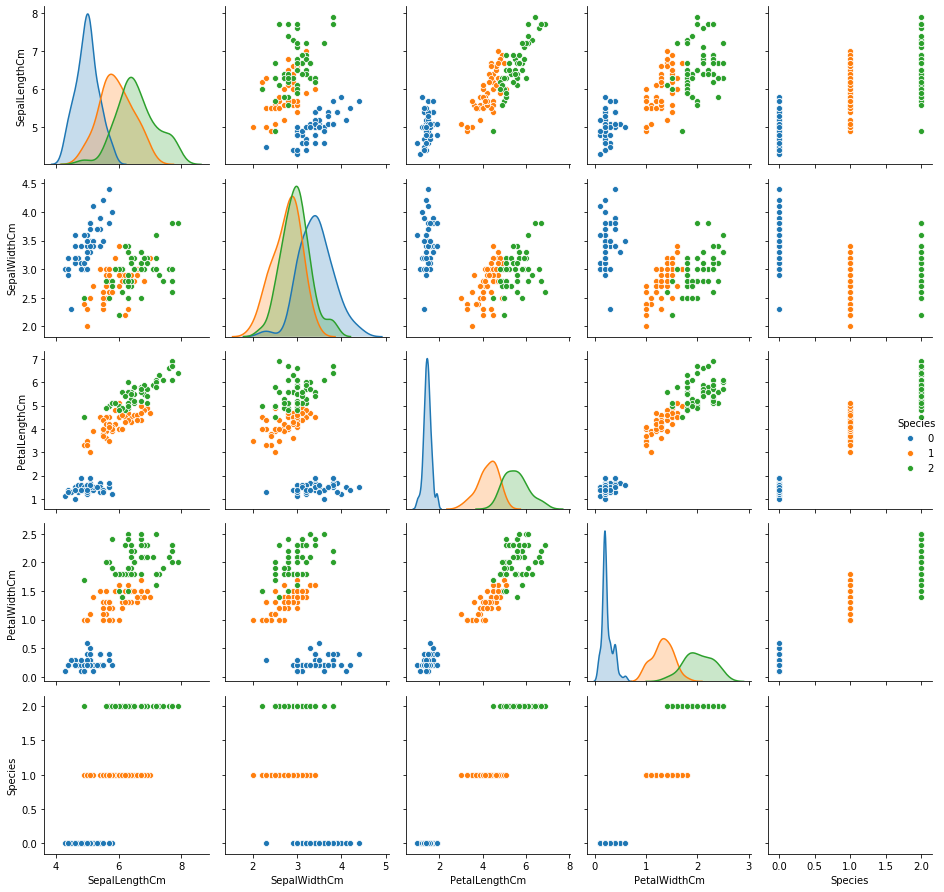

In [68]:
## Plotting
p = sns.pairplot(data, hue='Species')
plt.tight_layout()

### Helper functions for Network

In [69]:
def one_hot_encode(y):
        
    '''
        One-hot encode an array
    '''

    ## Determine the number of columns we need 
    ## based on the max value in the array
    num_columns = np.amax(y) + 1

    ## Create an array of zeros of shape (len(y), num_columns)
    binarized = np.zeros((len(y), num_columns))

    ## Replace 0 with 1. (float) wherever a value is present
    for i in range(len(y)):
        binarized[i, y[i]] = 1.

    ## Return one-hot-encoded array
    return binarized

In [70]:
def sigmoid(x):
        
    '''
        Sigmoid activation
        1 / (1 + e^(-x))
    '''

    return 1/(1+np.exp(-x))

In [71]:
def sigmoid_derivative(x):

    '''
        Derivative of sigmoid
    '''
    return sigmoid(x) * (1 - sigmoid(x))

### Data Preprocessing

In [72]:
from sklearn.preprocessing import normalize

In [73]:
X = normalize(data.drop(columns=['Species']).values)
X.shape

(150, 4)

In [74]:
y = data['Species'].values.flatten()
y.shape

(150,)

In [75]:
one_hot_y = one_hot_encode(y)
one_hot_y.shape

(150, 3)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.3)
X_train.shape, X_test.shape

((105, 4), (45, 4))

### Neurl Network with 3 Layers

The model has likely overfit the data. It scores a training accuracy of 100% and a testing accuracy of 89%. The graphs also show us that the model is overfitting.

In [50]:
## Weights for input -- 4 inputs, 10 outputs
w0 = 2 * np.random.random((4, 10)) - 1
w0

array([[-0.96236851, -0.20309659, -0.70552665,  0.10937102, -0.62391818,
        -0.14087287,  0.14827149,  0.02468909, -0.79092178,  0.68193747],
       [ 0.16312111, -0.15979355,  0.72494383,  0.75249326, -0.3360461 ,
        -0.20891051, -0.04902888,  0.40687045,  0.40748285, -0.49955098],
       [ 0.25471375,  0.33729496,  0.85548179,  0.63112804,  0.86306055,
         0.94257327, -0.11821778, -0.78305587, -0.5138486 ,  0.1688574 ],
       [ 0.73087538,  0.0087974 , -0.57829312, -0.59510146, -0.78844109,
         0.1779862 ,  0.5392698 , -0.44789929,  0.57621207,  0.84928563]])

In [51]:
## Weights for layer-1 -- 10 inputs, 3 outputs
w1 = 2 * np.random.random((10, 5)) - 1 
w1

array([[ 0.0051014 , -0.45368376, -0.38362577,  0.4719381 , -0.53004952],
       [ 0.93875578,  0.20054326, -0.5172579 , -0.57257972,  0.23629813],
       [ 0.6902207 , -0.35290027, -0.29274622, -0.0649074 ,  0.02413999],
       [-0.54261665,  0.93518418, -0.18537147,  0.57094045,  0.75407245],
       [-0.96432601, -0.7336119 , -0.63441111,  0.99801686, -0.60650448],
       [-0.96158114,  0.81146323, -0.58164057, -0.44227704, -0.86358935],
       [ 0.15638833,  0.01507031,  0.24839186, -0.82410383,  0.56769229],
       [ 0.25884876, -0.11982844, -0.18218215, -0.92354716, -0.32188651],
       [-0.38903642,  0.26306904, -0.23247378,  0.41103453,  0.18301107],
       [ 0.28219037,  0.10320595, -0.07449071,  0.89356913,  0.12102472]])

In [52]:
## Weights for layer 2 -- 5 inputs, 3 outputs
w2 = 2 * np.random.random((5, 3)) - 1
w2

array([[ 0.78835421, -0.14917508, -0.23480638],
       [-0.69428362, -0.15649845, -0.33076653],
       [ 0.57411876,  0.12110701, -0.24985546],
       [ 0.14904911,  0.03248605, -0.63349842],
       [ 0.69566042,  0.61559928, -0.34205186]])

In [53]:
lr = 0.1
errors = []
accuracy = []
iters = 10000

In [54]:
## Training
for i in range(iters):
    
    ## Feed forward
    
    ## Initial layer- input
    layer_0 = X_train
    
    ## Layer 1 - sigmoid(input * w0)
    layer_1 = np.dot(layer_0, w0)
    layer_1 = sigmoid(layer_1)
    
    ## Layer 2 - sigmoid(layer1 * w1)
    layer_2 = np.dot(layer_1, w1)
    layer_2 = sigmoid(layer_2)
    
    
    layer_3 = np.dot(layer_2, w2)
    layer_3 = sigmoid(layer_3)
    
    ## Backprop using Gradient Descent
    
    layer_3_error = y_train - layer_3
    layer_3_delta = layer_3_error * sigmoid_derivative(layer_3)
    
    layer_2_error = layer_3_delta.dot(w2.T)
    layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)
   
    layer_1_error = layer_2_delta.dot(w1.T)
    layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)
    
    w2 += layer_2.T.dot(layer_3_delta) * lr
    w1 += layer_1.T.dot(layer_2_delta) * lr
    w0 += layer_0.T.dot(layer_1_delta) * lr
    
    error = np.mean(np.abs(layer_3_error))
    errors.append(error)
    acc = (1 - error) * 100
    accuracy.append(acc)
    
    
print('Training Accuracy: {}%'.format(round(acc), 4))
print('Training Error: {}'.format(round(error, 4)))

Training Accuracy: 100.0%
Training Error: 0.0006


In [55]:
## Validation

layer_0 = X_test

layer_1 = sigmoid(np.dot(layer_0, w0))
layer_2 = sigmoid(np.dot(layer_1, w1))
layer_3 = sigmoid(np.dot(layer_2, w2))

layer_3_error = y_test - layer_3

error = np.mean(np.abs(layer_3_error))
acc = (1 - error) * 100

print('Validation Accuracy: {}%'.format(round(acc, 4)))
print('Validation Loss: {}'.format(round(error, 4)))

Validation Accuracy: 89.5969%
Validation Loss: 0.104


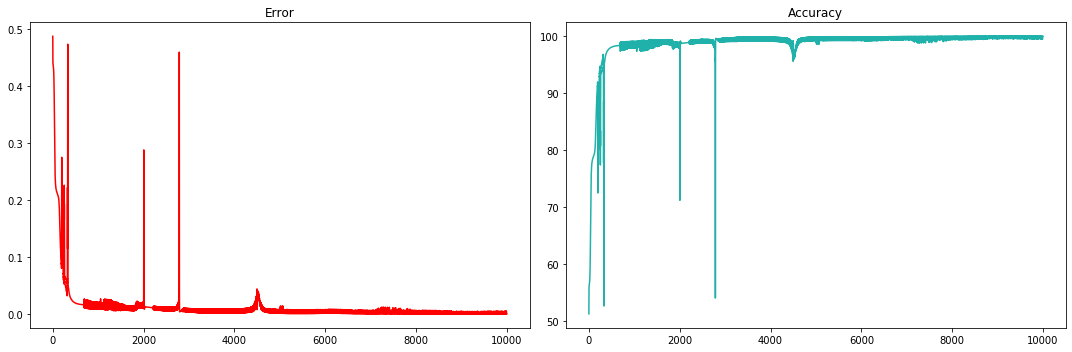

In [56]:
## Error plotting

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(errors, c='r')
plt.title('Error')

plt.subplot(1, 2, 2)
plt.plot(accuracy, color='lightseagreen')
plt.title('Accuracy')
plt.tight_layout()

### Neural Network with 2 Layers

The model fits perfectly, with training accuracy of 99% and testing accuracy of 98.6%. 

In [57]:
## Weights for input -- 4 inputs, 10 outputs
w0 = 2 * np.random.random((4, 10)) - 1
w0

array([[-0.46788707,  0.96151567, -0.49190469,  0.16650407, -0.15400765,
         0.37121875,  0.51971389,  0.27035436,  0.73699428,  0.45909298],
       [ 0.92866779,  0.16542631, -0.23294469, -0.7733455 ,  0.94688588,
         0.75771618,  0.90766095,  0.34130606, -0.98367858, -0.53989039],
       [ 0.17826575, -0.46722181,  0.70989936, -0.2415145 ,  0.22796054,
        -0.6568709 ,  0.64539029,  0.49007141,  0.06802715,  0.89280137],
       [-0.89702796,  0.19315058, -0.54674021, -0.56242569, -0.75192902,
        -0.88856727, -0.50661033,  0.2925169 ,  0.48470838,  0.60646503]])

In [58]:
## Weights for layer-1 -- 10 inputs, 3 outputs
w1 = 2 * np.random.random((10, 3)) - 1 
w1

array([[ 0.39711819, -0.20167446,  0.05515635],
       [-0.23690124,  0.99502541, -0.45940191],
       [ 0.41977811, -0.206324  , -0.58861494],
       [ 0.75365004, -0.79005553,  0.32584907],
       [-0.39260112,  0.63950121, -0.30534991],
       [-0.21946082,  0.64215692,  0.28876191],
       [-0.82282901,  0.05710165, -0.86697159],
       [-0.32812902, -0.55521699,  0.9220579 ],
       [-0.05075057,  0.82675917,  0.72030161],
       [-0.99490265, -0.91764417, -0.34377787]])

In [59]:
lr = 0.1
errors = []
accuracy = []
iters = 10000

In [60]:
## Training
for i in range(iters):
    
    ## Feed forward
    
    ## Initial layer- input
    layer_0 = X_train
    
    ## Layer 1 - sigmoid(input * w0)
    layer_1 = np.dot(layer_0, w0)
    layer_1 = sigmoid(layer_1)
    
    ## Layer 2 - sigmoid(layer1 * w1)
    layer_2 = np.dot(layer_1, w1)
    layer_2 = sigmoid(layer_2)
    

    ## Backprop
    
    layer_2_error = y_train - layer_2
    layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)
    
    layer_1_error = layer_2_delta.dot(w1.T)
    layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)
    
    w1 += layer_1.T.dot(layer_2_delta) * lr
    w0 += layer_0.T.dot(layer_1_delta) * lr
    
    error = np.mean(np.abs(layer_2_error))
    errors.append(error)
    acc = (1 - error) * 100
    accuracy.append(acc)
    
    
print('Training Accuracy: {}%'.format(round(acc), 4))
print('Training Error: {}'.format(round(error, 4)))

Training Accuracy: 99.0%
Training Error: 0.0135


In [61]:
## Validation

layer_0 = X_test

layer_1 = sigmoid(np.dot(layer_0, w0))
layer_2 = sigmoid(np.dot(layer_1, w1))

layer_3_error = y_test - layer_2

error = np.mean(np.abs(layer_2_error))
acc = (1 - error) * 100

print('Validation Accuracy: {}%'.format(round(acc, 4)))
print('Validation Loss: {}'.format(round(error, 4)))

Validation Accuracy: 98.6467%
Validation Loss: 0.0135


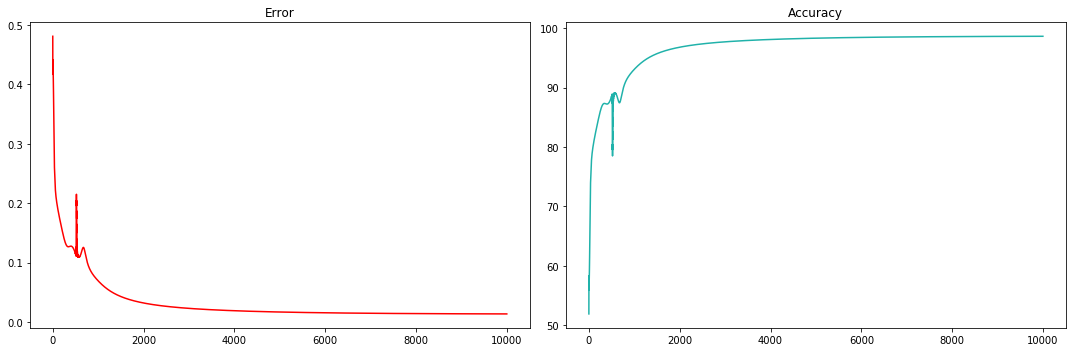

In [62]:
## Error plotting

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(errors, c='r')
plt.title('Error')

plt.subplot(1, 2, 2)
plt.plot(accuracy, color='lightseagreen')
plt.title('Accuracy')
plt.tight_layout()

A big thankyou to https://www.kaggle.com/niyipop/2-layer-neural-network-from-scratch-using-numpy for this super-simple demonstration.